<h1>Collecting Google Data</h1>
<hr>
<p>While looking into websites that could provide data that would pad the games list well, we noticed that google's knowledge panels basically gave us everything we need/want. Google tends to be pretty defensive when it comes to scraping, using captchas and human checks when there's a high volume of searches, so we'll have to see if that will be an issue during this portion of the project.</p>

<p>Our goals are to collect:
    <ul>
        <li>release year (if we don't already have it)</li>
        <li>player amount</li>
        <li>genre</li>
        <li>publisher (if we don't have it)</li>
        <li>description</li>
    </ul>
</p>

In [1]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import re

#google data collector

site = "https://www.google.com/search?q="
query = "Dreamcast+Bust-A-Move+4"
hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(site+query,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page)

attrs = []
for div in soup.findAll('div',{'class':'mod'}):
    attrs.append(div)



<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Dreamcast Bust-A-Move 4 - Google Search</title><script nonce="T0QjWVqsZCXZwR6q911MqQ==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=windo
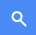
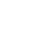
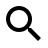
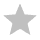
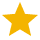
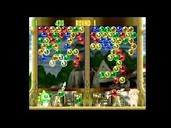
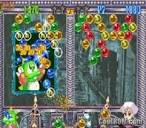
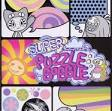
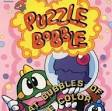
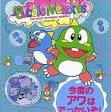
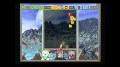

In [3]:
soup

<p>That doesn't get us what we want, because it seems google randomizes the classes for the knowledge panel. However theres serpAPI, which sadly is $50/month. BUT they have a 15 day free trial so we'll give that a shot.</p>

<p><b>Update,</b> with a burner card from privacy.com I was able to start a free trial. This should make life way easier. These queries don't grow on trees though, so I'm going to itir through the list of games while saving information from the api calls.</p>

In [6]:
import sys
!{sys.executable} -m pip install google_search_results

  Created wheel for google-search-results: filename=google_search_results-2.0.0-py3-none-any.whl size=14924 sha256=5efda5d71e5dbf7165d052b81a5bbb845c3f26b3279ea1753f351343f46c9451
  Stored in directory: c:\users\ambrose\appdata\local\pip\cache\wheels\4a\69\9f\c9d397ac9864df2b1de75bc0f5e3174cb39fde2562eef75a0f
Successfully built google-search-results


In [83]:
from serpapi import GoogleSearch
import csv

def serpapi(query,key):
    params = {
        "q": query,
        "hl": "en",
        "gl": "us",
        "google_domain": "google.com",
        "api_key": key,
    }

    client = GoogleSearch(params)
    results = client.get_dict()
    return results
    

<p>So the serpAPI seems to take around 2 seconds per query, which is pretty long when we have over 10k searches if I remember right. So the new plan of action is to load up the queries up front, let it do its thing, save them, and combine data in a fresh new notebook.</p>

<p>This block should take just under 2 hours to exec, its not frozen.</p>
<p><b>Update,</b> there's a rate limit of 1000 calls/hr so this whole thing is garbage data now. We'll have to pace ourselves I guess</p>

In [61]:
#PS1 and PS2(next block)

with open('data/ps1.csv', newline='') as csvfile:
     ps1 = csv.reader(csvfile)
     ps1 = list(ps1)
with open('data/ps2.csv', newline='') as csvfile:
     ps2 = csv.reader(csvfile)
     ps2 = list(ps2)

#start of ps1
    
results = []
keys = []
ki = 0
for i in ps1:
    if ki == 5:
        ki = 0
    k = keys[ki]
    q = i[0] + " " + i[1]
    resp = serpapi(q,k)
    results.append(resp)
    ki+=1

towrite = []
for i in results:
    try:
        towrite.append(i['knowledge_graph'])
    except:
        towrite.append("noGraph")

towrite = [towrite]
with open("ps1Results.csv", 'w', encoding="utf-8") as csvfile:  
    csvwriter = csv.writer(csvfile)  
    csvwriter.writerows(towrite)

<p>To save space, we made it a definition, and at the bottom we can call it using the input data and where we want to save it.</p>

In [84]:
#going to turn it into a definition

def pullData(csvIn,csvOut):
    with open(csvIn, newline='', encoding="utf-8") as csvfile:
         consoleData = csv.reader(csvfile)
         consoleData = list(consoleData)

    results = []
    keys = []
    ki = 0
    for i in consoleData:
        if ki == 5:
            ki = 0
        k = keys[ki]
        q = i[0] + " " + i[1]
        resp = serpapi(q,k)
        results.append(resp)
        ki+=1

    towrite = []
    for i in results:
        try:
            towrite.append(i['knowledge_graph'])
        except:
            towrite.append("noGraph")

    towrite = [towrite]
    with open(csvOut, 'w', encoding="utf-8") as csvfile:  
        csvwriter = csv.writer(csvfile)  
        csvwriter.writerows(towrite)
        
# in order to work properly, csvIn 1st column must be console
# and 2nd column must be game name
# csvOut should be "consoleResults.csv"

pullData('data/3DS.csv','3dsResults.csv')

<p>These final blocks are just to test to see if the information was saved properly. We can open and explore the CSVs to make sure nothing weird happened.</p>

In [85]:
#testing for CSV saving properly

import sys
import csv
maxInt = sys.maxsize
while True:
    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

with open('3dsResults.csv', newline='', encoding="utf-8") as csvfile:
     resTest = csv.reader(csvfile)
     resTest = list(resTest)
resTest = resTest[0]

'{\'title\': \'Pokémon Picross\', \'type\': \'Video game\', \'header_images\': [{\'image\': \'\', \'source\': \'https://en.wikipedia.org/wiki/Pok%C3%A9mon_Picross\'}, {\'image\': \'\', \'source\': \'https://www.nintendo.com/games/detail/pokemon-picross-3ds/\'}, {\'image\': \'\', \'source\': \'https://www.nintendo.com/games/detail/pokemon-picross-3ds/\'}, {\'image\': \'\', \'source\': \'https://www.nintendo.co.uk/Games/Nintendo-3DS-download-software/Pokemon-Picross-1074224.html\'}, {\'image\': \'\', \'source\': \'https://www.pokemon.com/us/pokemon-video-games/pokemon-picross/\'}, {\'image\': \'\', \'source\': \'https://www.nintendo.com/games/detail/pokemon-picross-3ds/\'}, {\'image\': \'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ_7ljKefZ5BT_ablHxAK_NyqDs58OAWECxm8bmSBmXSw&s\', \'source\': \'https://www.nintendo.com/games/detail/pokemon-picross-3ds/\'}], \'description\': \'Pokémon Picross is a freemium puzzle video game featuring Pokémon characters developed by Jupiter Corpor
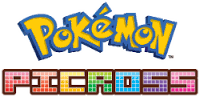
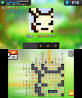
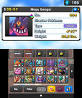
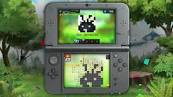
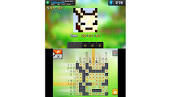
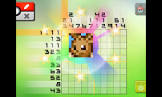
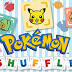
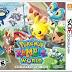
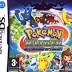
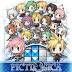
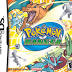

In [89]:
resTest[730]

In [87]:
e=0
for i in resTest:
    if i == 'noGraph':
        #print(e)
        e+=1
print(e)

518
